In [2]:
import wget 

url = 'https://covid19.galaxyproject.org/genomics/4-Variation/current_complete_ncov_genomes.fasta'
file = '../../current_complete_ncov_genomes.fasta'
wget.download(url, file)

'../../current_complete_ncov_genomes.fasta'

In [4]:
!/Users/anandrajiv/Downloads/virulign

Usage: virulign [reference.fasta orf-description.xml] sequences.fasta
Optional parameters (first option will be the default):
  --exportKind [Mutations PairwiseAlignments GlobalAlignment PositionTable MutationTable]
  --exportAlphabet [AminoAcids Nucleotides]
  --exportWithInsertions [yes no]
  --exportReferenceSequence [no yes]
  --gapExtensionPenalty doubleValue=>3.3
  --gapOpenPenalty doubleValue=>10.0
  --maxFrameShifts intValue=>3
  --progress [no yes]
  --nt-debug directory
Output: The alignment will be printed to standard out and any progress or error messages will be printed to the standard error. This output can be redirected to files, e.g.:
   virulign ref.xml sequence.fasta > alignment.mutations 2> alignment.err


In [6]:
!git clone https://github.com/rega-cev/virulign-tutorial /Users/anandrajiv/Desktop/virulign-tutorial

Cloning into '/Users/anandrajiv/Desktop/virulign-tutorial'...
remote: Enumerating objects: 179, done.
remote: Total 179 (delta 0), reused 0 (delta 0), pack-reused 179
Receiving objects: 100% (179/179), 61.51 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (86/86), done.
Checking out files: 100% (70/70), done.


In [7]:
!git clone https://github.com/rega-cev/virulign /Users/anandrajiv/Desktop/virulign

Cloning into '/Users/anandrajiv/Desktop/virulign'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 206 (delta 22), reused 27 (delta 6), pack-reused 154
Receiving objects: 100% (206/206), 153.38 KiB | 4.79 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [9]:
!/Users/anandrajiv/Downloads/virulign /Users/anandrajiv/Desktop/virulign/references/SARS-CoV-2/S.xml /Users/anandrajiv/Downloads/current_complete_ncov_genomes.fasta --exportAlphabet Nucleotides --exportKind PositionTable > /Users/anandrajiv/Desktop/position_table.csv

Align target 0 (MT007544.1)
Align target 1 (MT019529.1)
Align target 2 (MT019530.1)
Align target 3 (MT019531.1)
Align target 4 (MT019532.1)
Align target 5 (MT019533.1)
Align target 6 (MT020880.1)
Align target 7 (MT020881.1)
Align target 8 (MT027062.1)
Align target 9 (MT027063.1)
Align target 10 (MT027064.1)
Align target 11 (MT039873.1)
Align target 12 (MT039887.1)
Align target 13 (MT039888.1)
Align target 14 (MT039890.1)
Align target 15 (MT044257.1)
Align target 16 (MT044258.1)
Align target 17 (MT049951.1)
Align target 18 (MT066175.1)
Align target 19 (MT066176.1)
Align target 20 (MT072688.1)
Align target 21 (MT093571.1)
Align target 22 (MT093631.2)
Align target 23 (MT106052.1)
Align target 24 (MT106053.1)
Align target 25 (MT106054.1)
Align target 26 (MT118835.1)
Align target 27 (MT123290.1)
Align target 28 (MT123291.2)
Align target 29 (MT123292.2)
Align target 30 (MT123293.2)
Align target 31 (MT126808.1)
Align target 32 (MT135041.1)
Align target 33 (MT135042.1)
Align target 34 (MT13504

In [11]:
import pandas as pd 

position_table = pd.read_csv("position_table.csv")

In [12]:
results = position_table.describe()
results

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
count,820,820,820,820,820,820,820,820,820,820,...,820,820,820,820,820,820,820,820,820,820
unique,820,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,MT159720.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
freq,1,820,820,820,820,820,820,820,820,820,...,820,820,820,820,820,820,820,820,820,820


In [13]:
concensus_seq = position_table.drop('seqid',axis=1).mode(axis=0).T[0]
concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
           ..
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [14]:
position_table = position_table.set_index('seqid')

In [15]:
distance_from_concensus_seq = position_table.apply(lambda row: sum(row != concensus_seq),axis=1)
distance_from_concensus_seq_sorted = distance_from_concensus_seq.sort_values(ascending=False)
distance_from_concensus_seq_sorted

seqid
MT345850.1    263
MT345852.1    141
MT345843.1    122
MT345884.1     97
MT233522.1     82
             ... 
MT263449.1      0
MT263451.1      0
MT263452.1      0
MT263454.1      0
MT263422.1      0
Length: 820, dtype: int64

In [16]:
subset_seqs = distance_from_concensus_seq_sorted[:10].index
subset_seqs

Index(['MT345850.1', 'MT345852.1', 'MT345843.1', 'MT345884.1', 'MT233522.1',
       'MT308696.1', 'MT308694.1', 'MT263453.1', 'MT259284.1', 'MT293180.1'],
      dtype='object', name='seqid')

In [17]:
distances = {}
for i,seqid1 in enumerate(subset_seqs):
    distances[seqid1,seqid1]=0
    for j in range(i+1,len(subset_seqs)):
        seqid2 = subset_seqs[j]
        distances[seqid1,seqid2] = sum(position_table.loc[seqid1] != position_table.loc[seqid2])
        distances[seqid2,seqid1] = distances[seqid1,seqid2]
distances = pd.Series(distances).unstack()
distances

,MT233522.1,MT259284.1,MT263453.1,MT293180.1,MT308694.1,MT308696.1,MT345843.1,MT345850.1,MT345852.1,MT345884.1
MT233522.1,0,115,130,104,135,151,202,345,221,177
MT259284.1,115,0,81,47,86,104,107,230,108,94
MT263453.1,130,81,0,68,101,119,134,299,189,143
MT293180.1,104,47,68,0,77,93,130,273,153,89
MT308694.1,135,86,101,77,0,22,175,286,194,150
MT308696.1,151,104,119,93,22,0,191,288,210,166
MT345843.1,202,107,134,130,175,191,0,211,77,115
MT345850.1,345,230,299,273,286,288,211,0,164,276
MT345852.1,221,108,189,153,194,210,77,164,0,136
MT345884.1,177,94,143,89,150,166,115,276,136,0


In [38]:
import numpy as np
from Bio.Phylo.TreeConstruction import DistanceMatrix
matrix = np.tril(distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm = DistanceMatrix(list(distances.index), matrix)

In [39]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

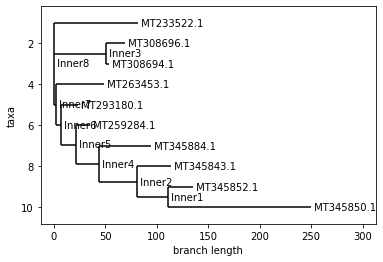

In [40]:
%matplotlib inline

from Bio import Phylo
tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)